# Dataset EDA

| Date | User | Change Type | Remarks |  
| ---- | ---- | ----------- | ------- |
| 19/03/2025   | Martin | Created   | Loading and Data cleaning | 
| 26/03/2025   | Martin | Update   | Started exploratory data analysis for data set | 

# Content

* [Load Data](#load-data)
* [Exploratory Data Analysis](#exploratory-data-analysis)

# Load Data

In [60]:
%load_ext watermark
%matplotlib inline

import polars as pl
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle, islice, chain

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [38]:
train = pl.read_csv('data/train.csv')
test = pl.read_csv('data/test.csv')
orig = pl.read_csv('data/Rainfall.csv')

In [39]:
train.glimpse()

Rows: 2190
Columns: 13
$ id            <i64> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
$ day           <i64> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
$ pressure      <f64> 1017.4, 1019.5, 1024.1, 1013.4, 1021.8, 1022.7, 1022.8, 1019.7, 1017.4, 1025.4
$ maxtemp       <f64> 21.2, 16.2, 19.4, 18.1, 21.3, 20.6, 19.5, 15.8, 17.6, 16.5
$ temparature   <f64> 20.6, 16.9, 16.1, 17.8, 18.4, 18.6, 18.4, 13.6, 16.5, 14.4
$ mintemp       <f64> 19.9, 15.8, 14.6, 16.9, 15.2, 16.5, 15.3, 12.7, 15.6, 12.0
$ dewpoint      <f64> 19.4, 15.4, 9.3, 16.8, 9.6, 12.5, 11.3, 11.8, 12.5, 8.6
$ humidity      <f64> 87.0, 95.0, 75.0, 95.0, 52.0, 79.0, 56.0, 96.0, 86.0, 77.0
$ cloud         <f64> 88.0, 91.0, 47.0, 95.0, 45.0, 81.0, 46.0, 100.0, 100.0, 84.0
$ sunshine      <f64> 1.1, 0.0, 8.3, 0.0, 3.6, 0.0, 7.6, 0.0, 0.0, 1.0
$ winddirection <f64> 60.0, 50.0, 70.0, 60.0, 40.0, 20.0, 20.0, 50.0, 50.0, 50.0
$ windspeed     <f64> 17.2, 21.9, 18.1, 35.6, 24.8, 15.7, 28.4, 52.8, 37.5, 38.3
$ rainfall      <i64> 1, 1, 1, 1, 0, 1, 0, 1, 1, 0



In [40]:
train.head()

id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64
0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [41]:
test.head()

id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [42]:
orig.head()

day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
i64,f64,f64,f64,f64,f64,i64,i64,str,f64,i64,f64
1,1025.9,19.9,18.3,16.8,13.1,72,49,"""yes""",9.3,80,26.3
2,1022.0,21.7,18.9,17.2,15.6,81,83,"""yes""",0.6,50,15.3
3,1019.7,20.3,19.3,18.0,18.4,95,91,"""yes""",0.0,40,14.2
4,1018.9,22.3,20.6,19.1,18.8,90,88,"""yes""",1.0,50,16.9
5,1015.9,21.3,20.7,20.2,19.9,95,81,"""yes""",0.0,40,13.7


In [43]:
# Rename column names and change some data types on original dataframe
## Remove whitespace inside the column names
orig.columns = [col.strip() for col in orig.columns]

## Cast the different data types
orig = orig.with_columns(
  pl.col('humidity').cast(pl.Float64),
  pl.col('cloud').cast(pl.Float64),
  pl.col('winddirection').cast(pl.Float64),
)

## Change rainfall to binary encoded data
orig = orig.with_columns(
  pl.when(pl.col('rainfall') == 'yes')
    .then(1)
    .otherwise(0)
    .alias('rainfall')
    .cast(pl.Int64)
)

## Change the day to be 
orig = orig.with_columns(
  pl.Series("day", list(range(1, 367)))
)

In [44]:
# Create a merged dataframe that contains both their data but add a column to indicate their difference
orig_ind = orig.with_columns(
  pl.Series('extra', [1] * orig.shape[0])
)

train_ind = train.drop('id').with_columns(
  pl.Series('extra', [1] * train.shape[0])
)

test_ind = test.with_columns(
  pl.Series('extra', [1] * test.shape[0])
)

combined_ind = pl.concat([orig_ind, train_ind], how='diagonal')
combined_ind.head()

day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed,extra
i64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,i64
1,1025.9,19.9,18.3,16.8,13.1,72.0,49.0,1,9.3,80.0,26.3,1
2,1022.0,21.7,18.9,17.2,15.6,81.0,83.0,1,0.6,50.0,15.3,1
3,1019.7,20.3,19.3,18.0,18.4,95.0,91.0,1,0.0,40.0,14.2,1
4,1018.9,22.3,20.6,19.1,18.8,90.0,88.0,1,1.0,50.0,16.9,1
5,1015.9,21.3,20.7,20.2,19.9,95.0,81.0,1,0.0,40.0,13.7,1


---

# Exploratory Data Analysis

Data set is quite straightforward with only some minor data cleaning to perform. Since this is a binary classification model based on some time-series information, we want to observe if there is any difference between the 2 groups (rain vs. shine) and if there is any seasonality withint the data

Plots to explore:
* Line plot by year
* Time series plot for each variable (rain vs. shine)
* Boxplot for each variable (rain vs. shine)
* Pair plot

Line and scatter plot by separated by years. See if there is any seasonality between the rainy days

In [ ]:
years = [[i]*365 for i in range(1, 7)]
years = list(chain(*years))

# Create a column to separate the years
train_plot = train.with_columns(
  pl.Series("year", years)
)

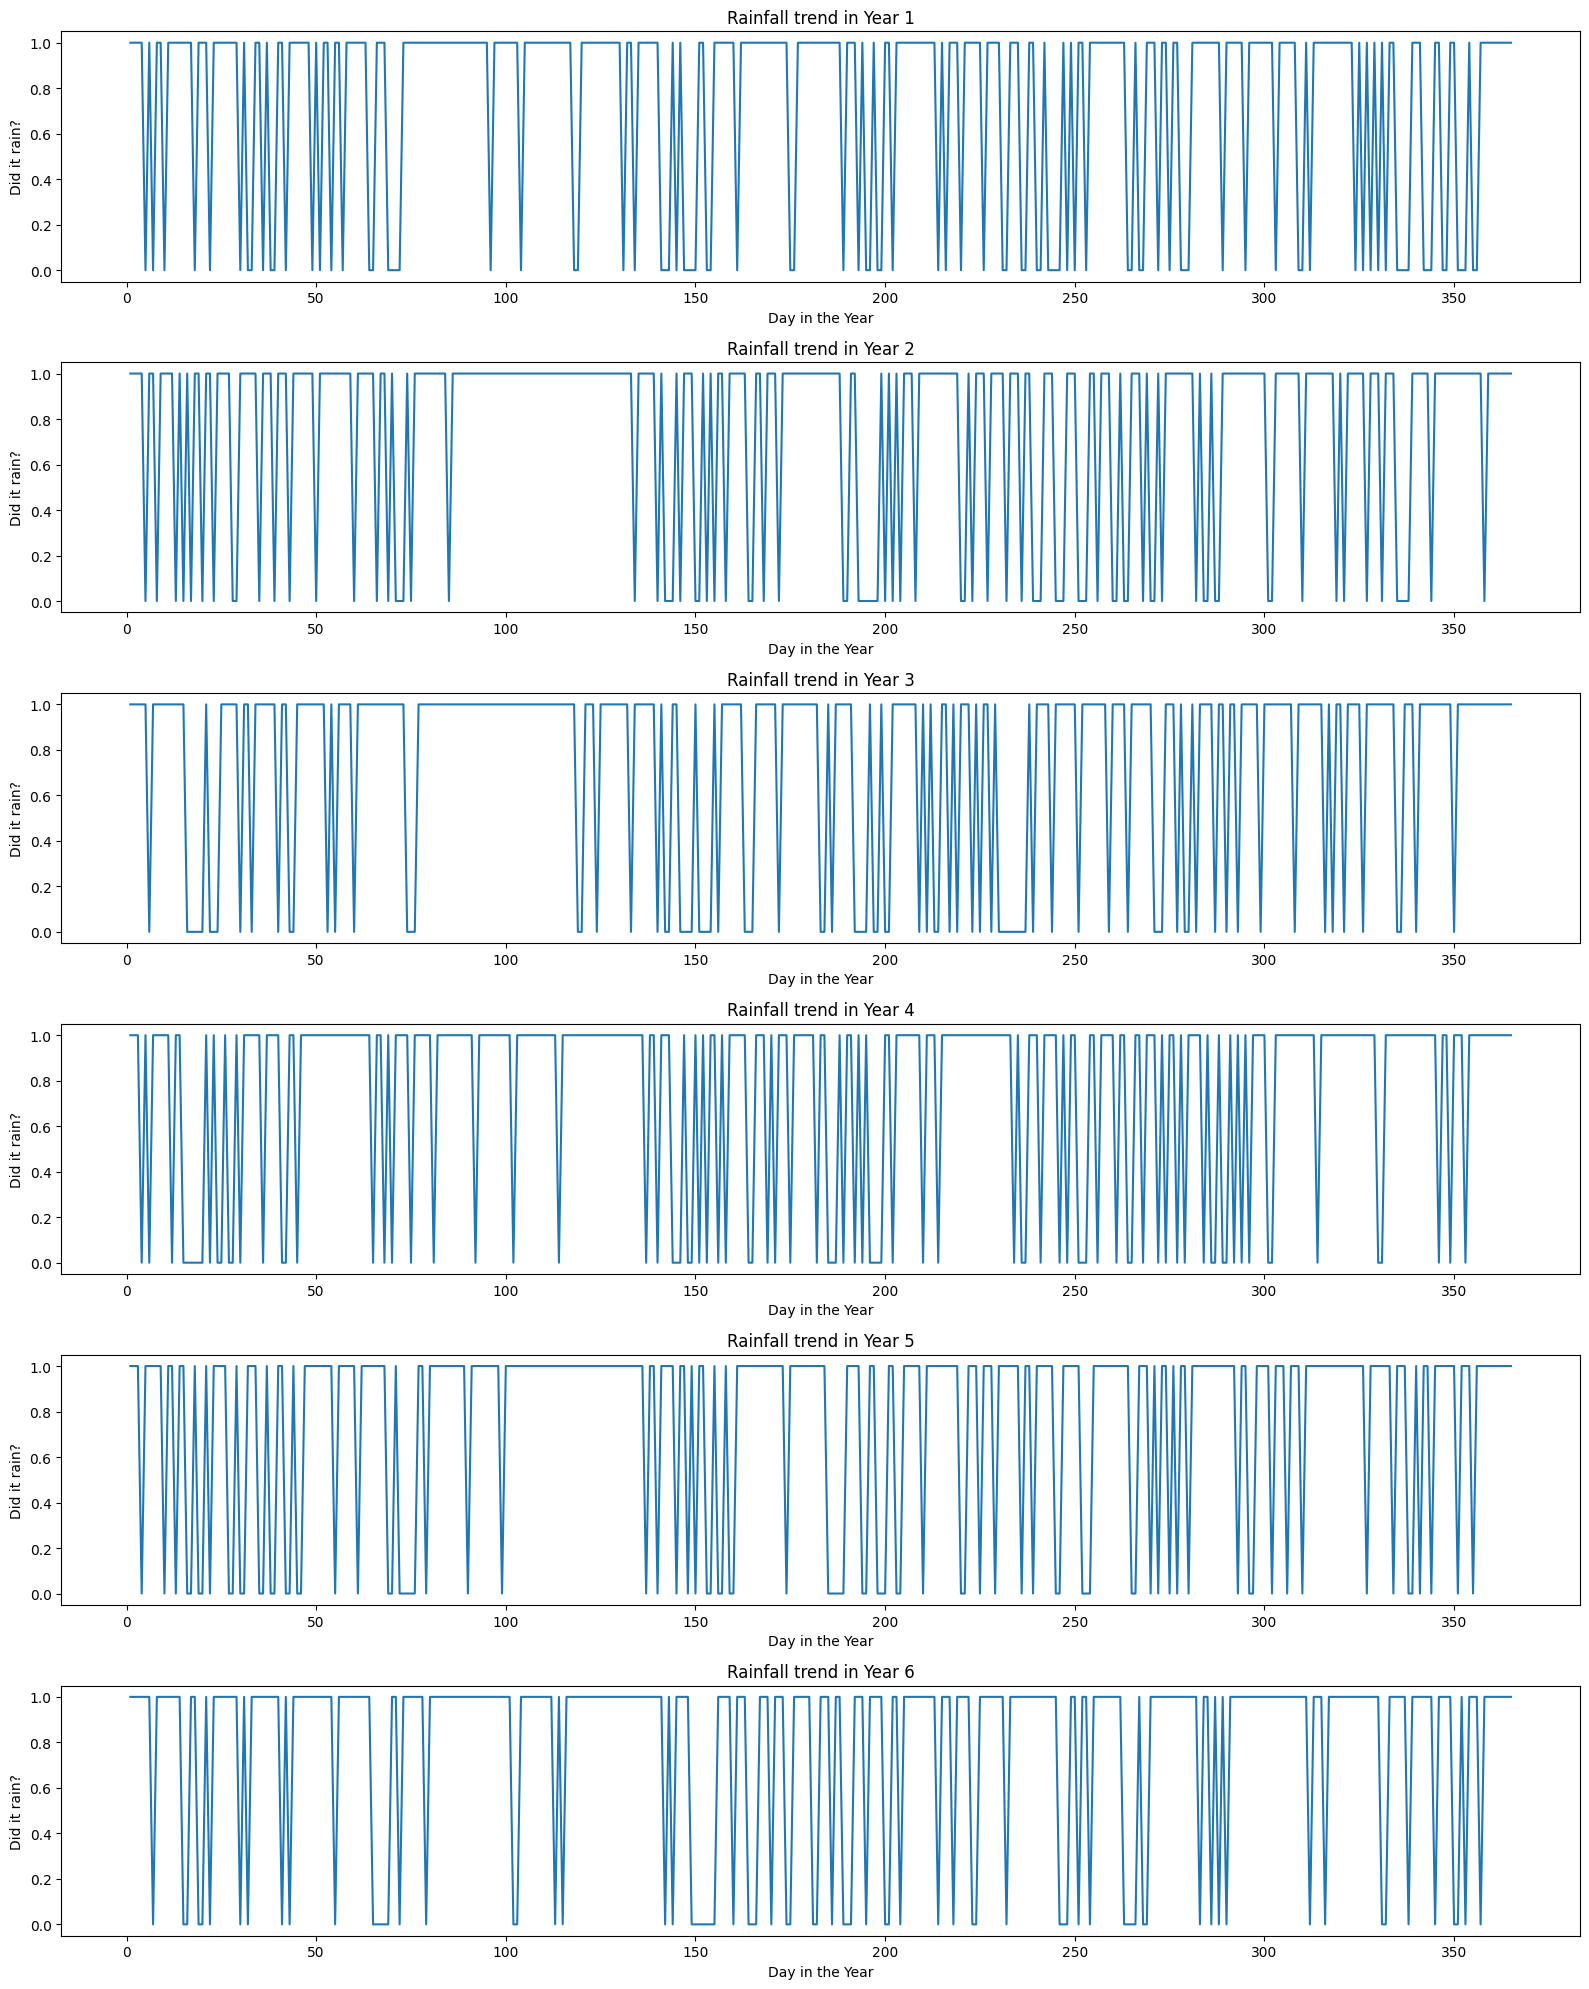

In [102]:
## Line + Scatter plot
num_plots = len(train_plot['year'].unique())
fig, ax = plt.subplots(nrows=num_plots, figsize=(16, 20))

for i in range(1, num_plots+1):
  plotter = train_plot.filter(
    pl.col('year') == i
  )
  ax[i-1].plot(range(1, 366), plotter['rainfall'])
  ax[i-1].set_title(f"Rainfall trend in Year {i}")
  ax[i-1].set_xlabel(f"Day in the Year")
  ax[i-1].set_ylabel(f"Did it rain?")

fig.tight_layout()

No real observable trend here, seems like the fluctuations happen quite frequently. There's a lot more rainy days in the time near 100 days

Time-series (line plot) for each variable, comparing between both rain and shine

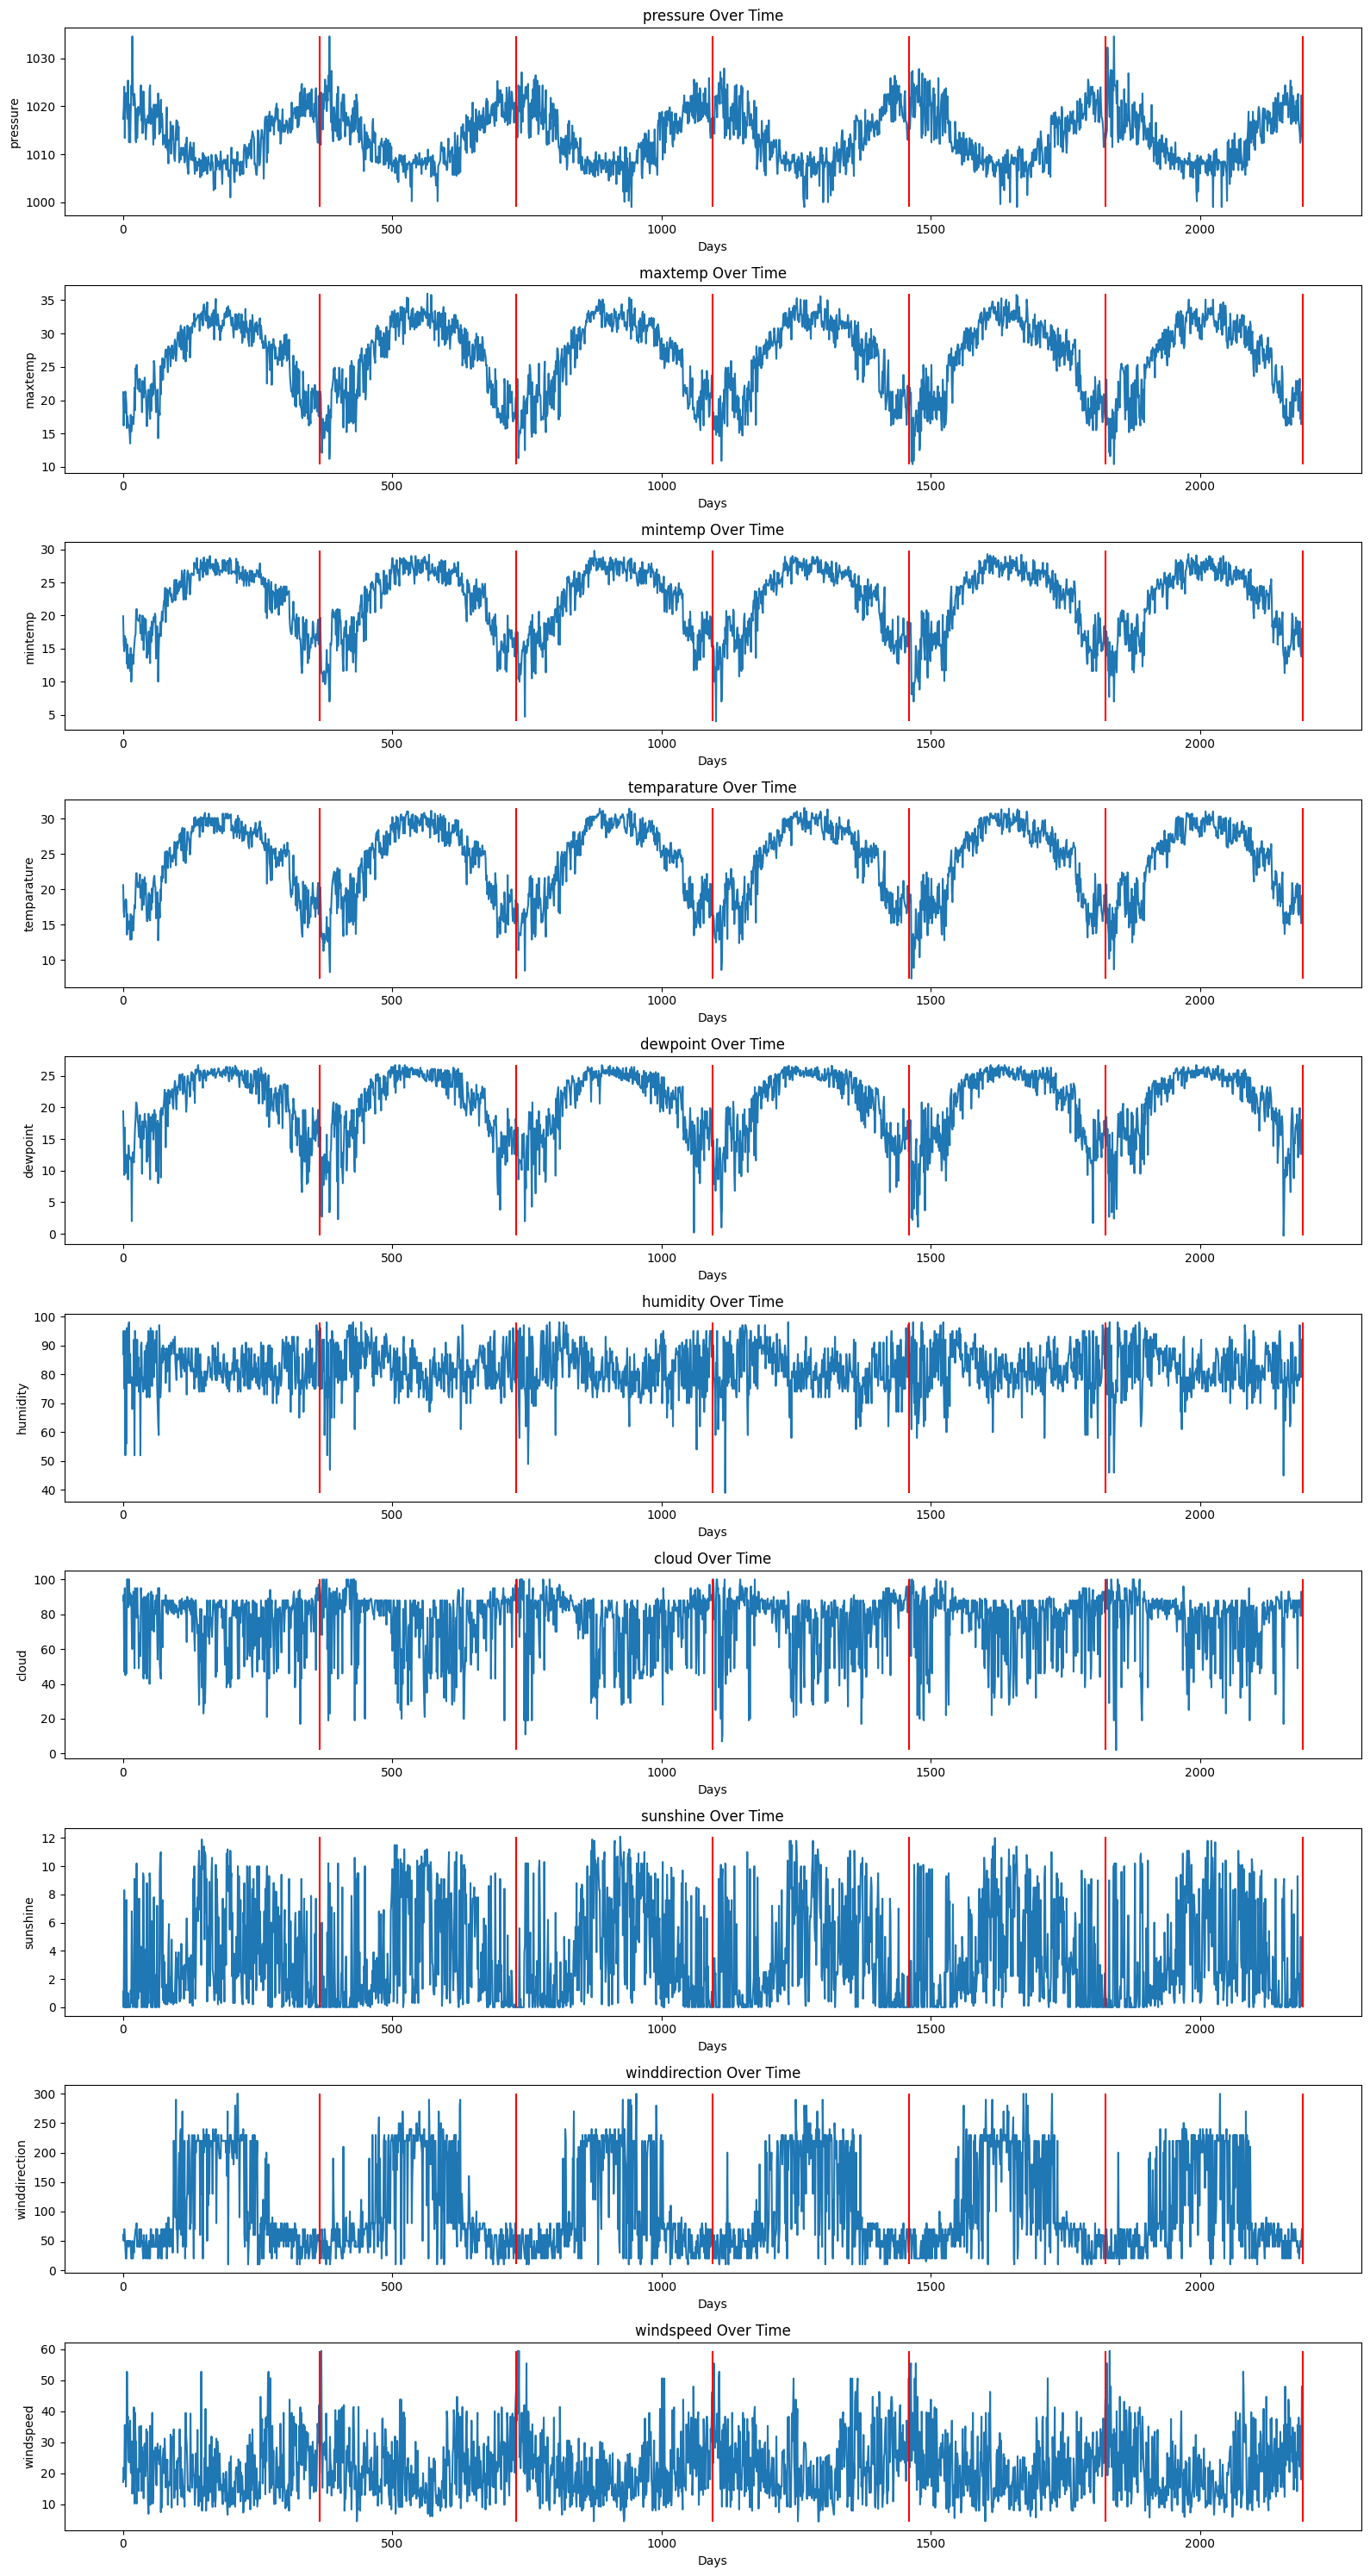

In [101]:
col_list = ['pressure', 'maxtemp', 'mintemp', 'temparature', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']

fig, ax = plt.subplots(nrows=len(col_list), figsize=(16, 30))
for i in range(len(col_list)):
  ax[i].plot(train['id'], train[col_list[i]])
  for j in range(1, 7):
    ax[i].vlines(j*365, ymin=train[col_list[i]].min(), ymax=train[col_list[i]].max(), color='red')
  ax[i].set_title(f"{col_list[i]} Over Time")
  ax[i].set_xlabel(f"Days")
  ax[i].set_ylabel(col_list[i])

fig.tight_layout()

Observe a lot of seasonality